In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv('Amazon Sales data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [4]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [6]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Year'] = df['Ship Date'].dt.year

In [7]:
df.to_csv('Amazon_sales_transformed.csv', index=False)

In [8]:
monthly_sales = df.groupby('Order Month')['Total Revenue'].sum().reset_index()
annual_sales = df.groupby('Order Year')['Total Revenue'].sum().reset_index()

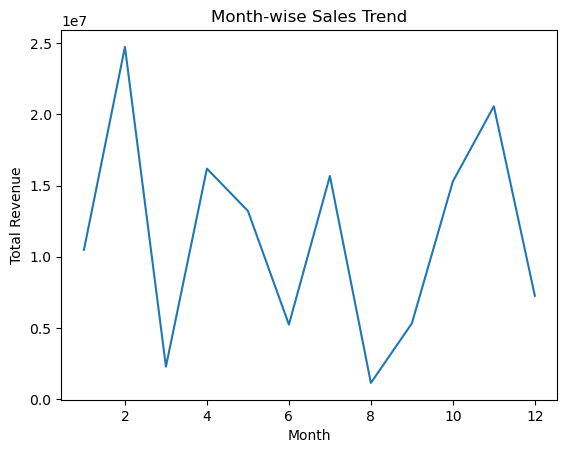

In [9]:
plt.plot(monthly_sales['Order Month'], monthly_sales['Total Revenue'])
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Month-wise Sales Trend')
plt.show()

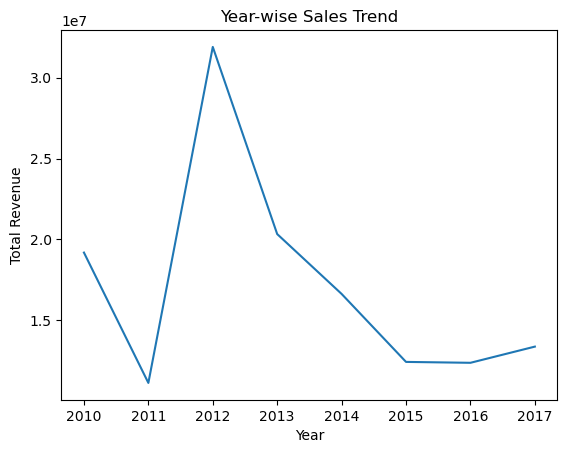

In [10]:
plt.plot(annual_sales['Order Year'], annual_sales['Total Revenue'])
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Year-wise Sales Trend')
plt.show()

In [11]:
yearly_monthly_sales = df.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().reset_index()


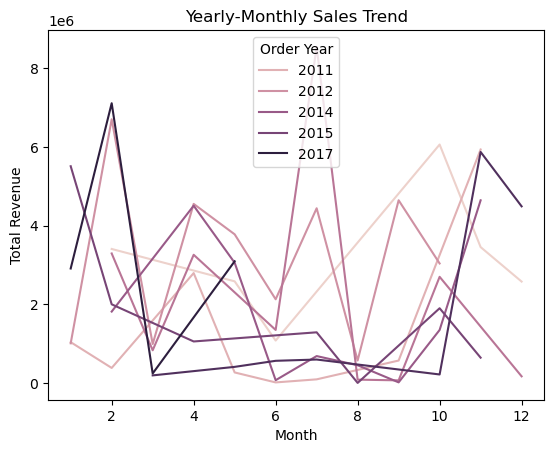

In [12]:
sns.lineplot(x='Order Month', y='Total Revenue', hue='Order Year', data=yearly_monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Yearly-Monthly Sales Trend')
plt.show()

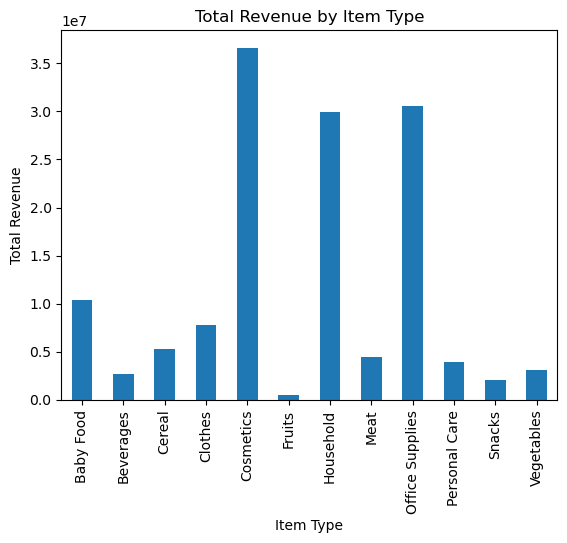

In [20]:
df.groupby('Item Type')['Total Revenue'].sum().plot(kind='bar')
plt.title('Total Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.show()

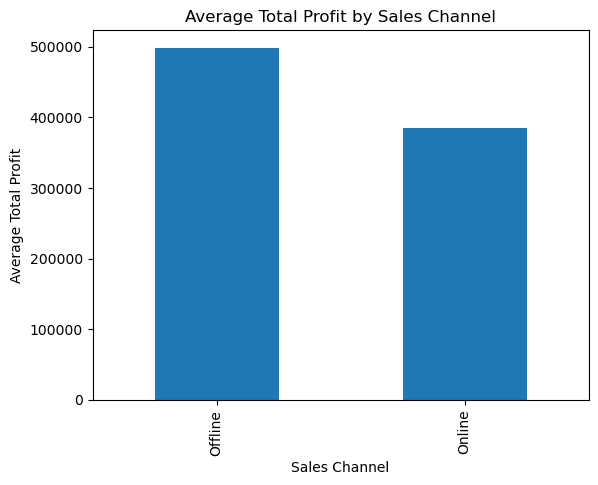

In [21]:
df.groupby('Sales Channel')['Total Profit'].mean().plot(kind='bar')
plt.title('Average Total Profit by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Total Profit')
plt.show()

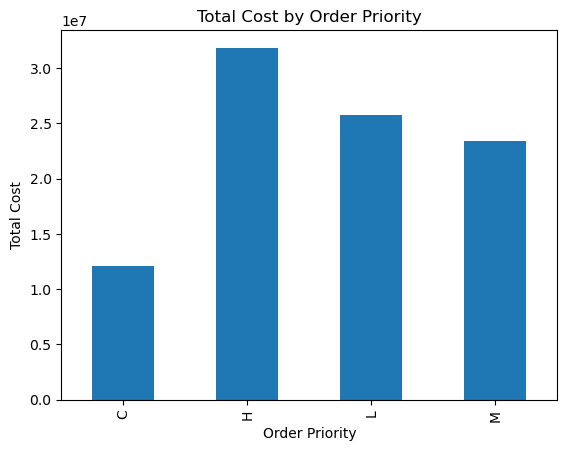

In [22]:
df.groupby('Order Priority')['Total Cost'].sum().plot(kind='bar')
plt.title('Total Cost by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Cost')
plt.show()


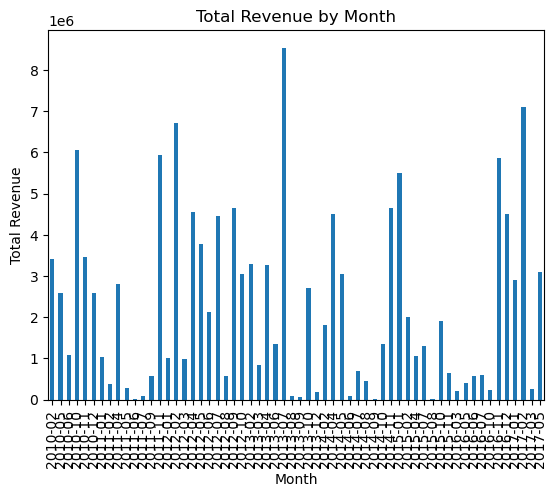

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')
df.groupby('Month')['Total Revenue'].sum().plot(kind='bar')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


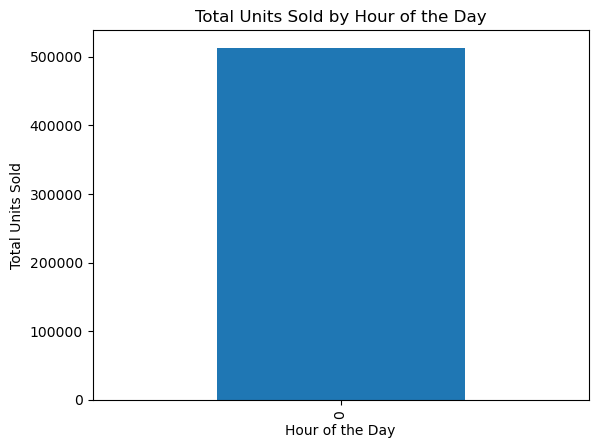

In [24]:
df['Hour'] = df['Order Date'].dt.hour
df.groupby('Hour')['Units Sold'].sum().plot(kind='bar')
plt.title('Total Units Sold by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Units Sold')
plt.show()

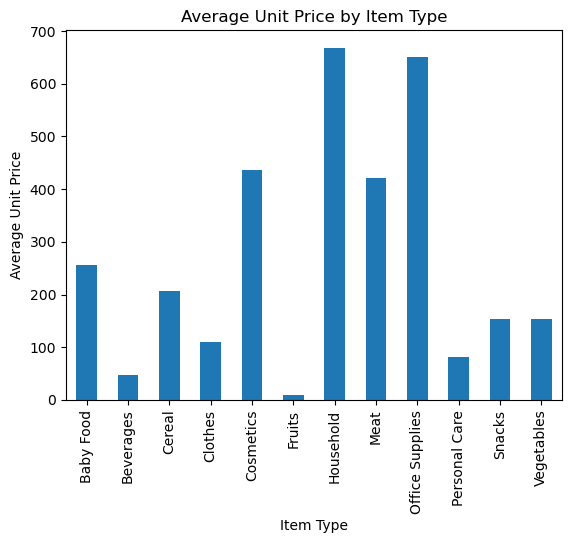

In [25]:
df.groupby('Item Type')['Unit Price'].mean().plot(kind='bar')
plt.title('Average Unit Price by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Unit Price')
plt.show()

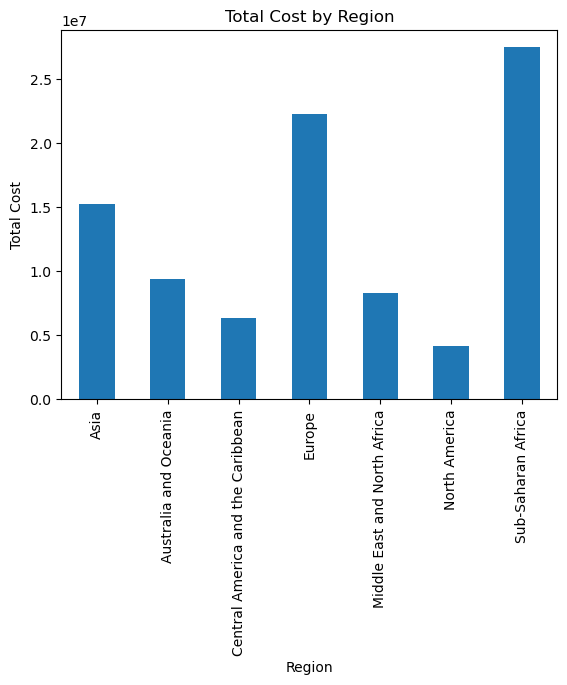

In [26]:
df.groupby('Region')['Total Cost'].sum().plot(kind='bar')
plt.title('Total Cost by Region')
plt.xlabel('Region')
plt.ylabel('Total Cost')
plt.show()

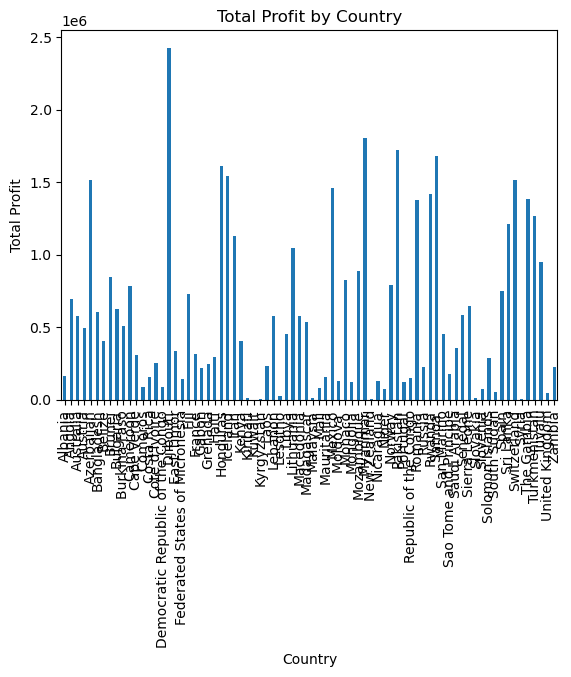

In [27]:
df.groupby('Country')['Total Profit'].sum().plot(kind='bar')
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.show()

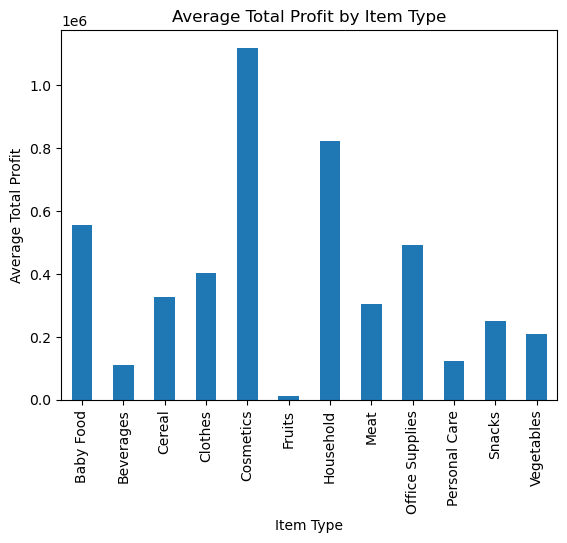

In [28]:
df.groupby('Item Type')['Total Profit'].mean().plot(kind='bar')
plt.title('Average Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Total Profit')
plt.show()

<Axes: >

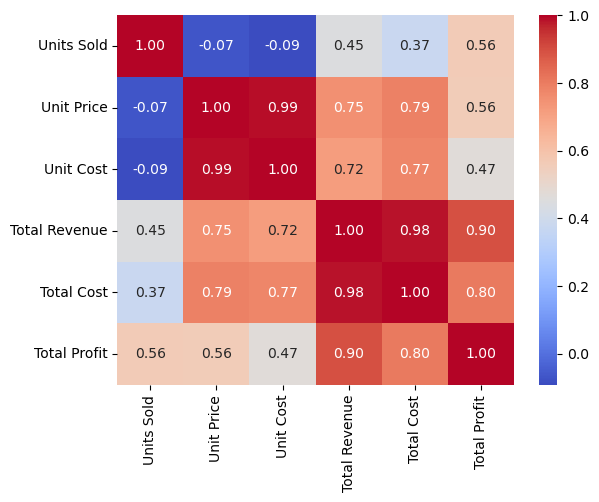

In [29]:
corr_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

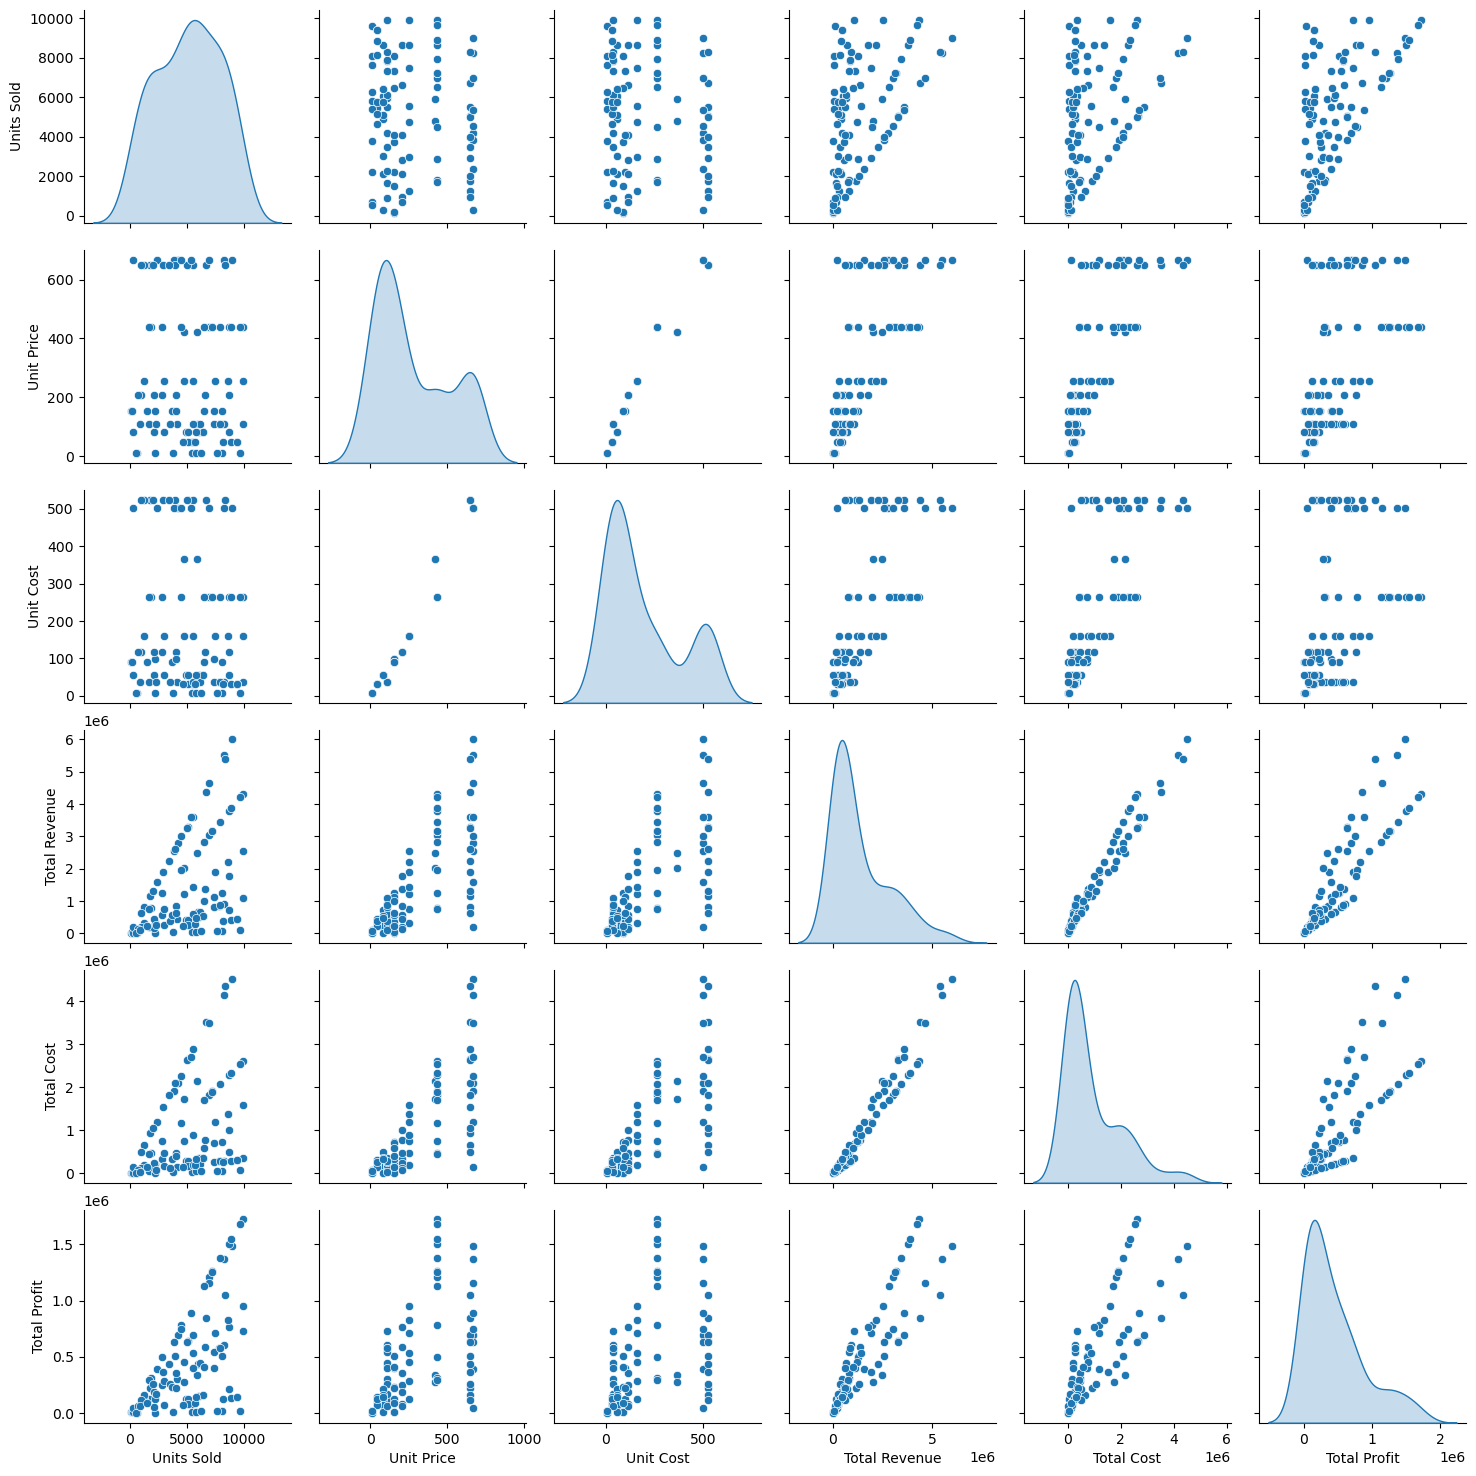

In [30]:
sns.pairplot(df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']], diag_kind="kde")

# Show the plot
plt.show()


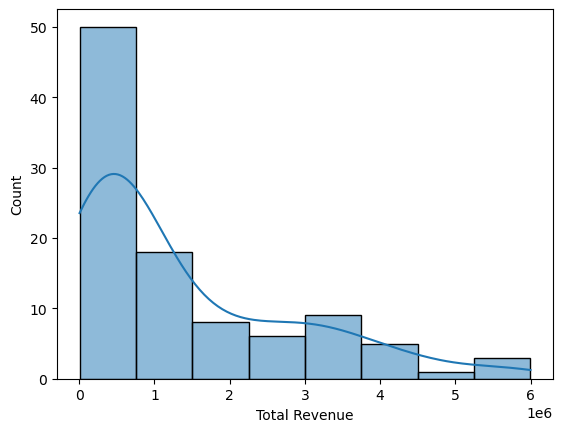

In [31]:
sns.histplot(df['Total Revenue'], kde=True)

# Show the plot
plt.show()

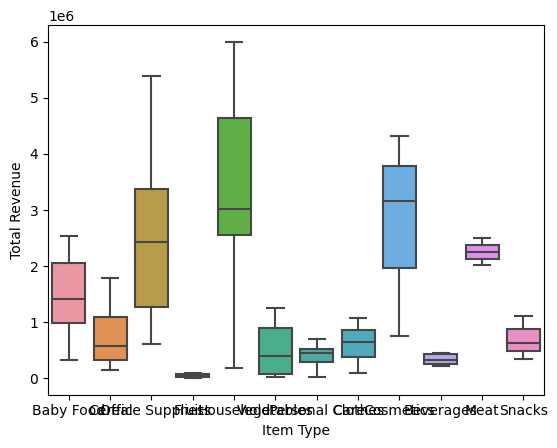

In [32]:
sns.boxplot(x=df['Item Type'], y=df['Total Revenue'])

# Show the plot
plt.show()


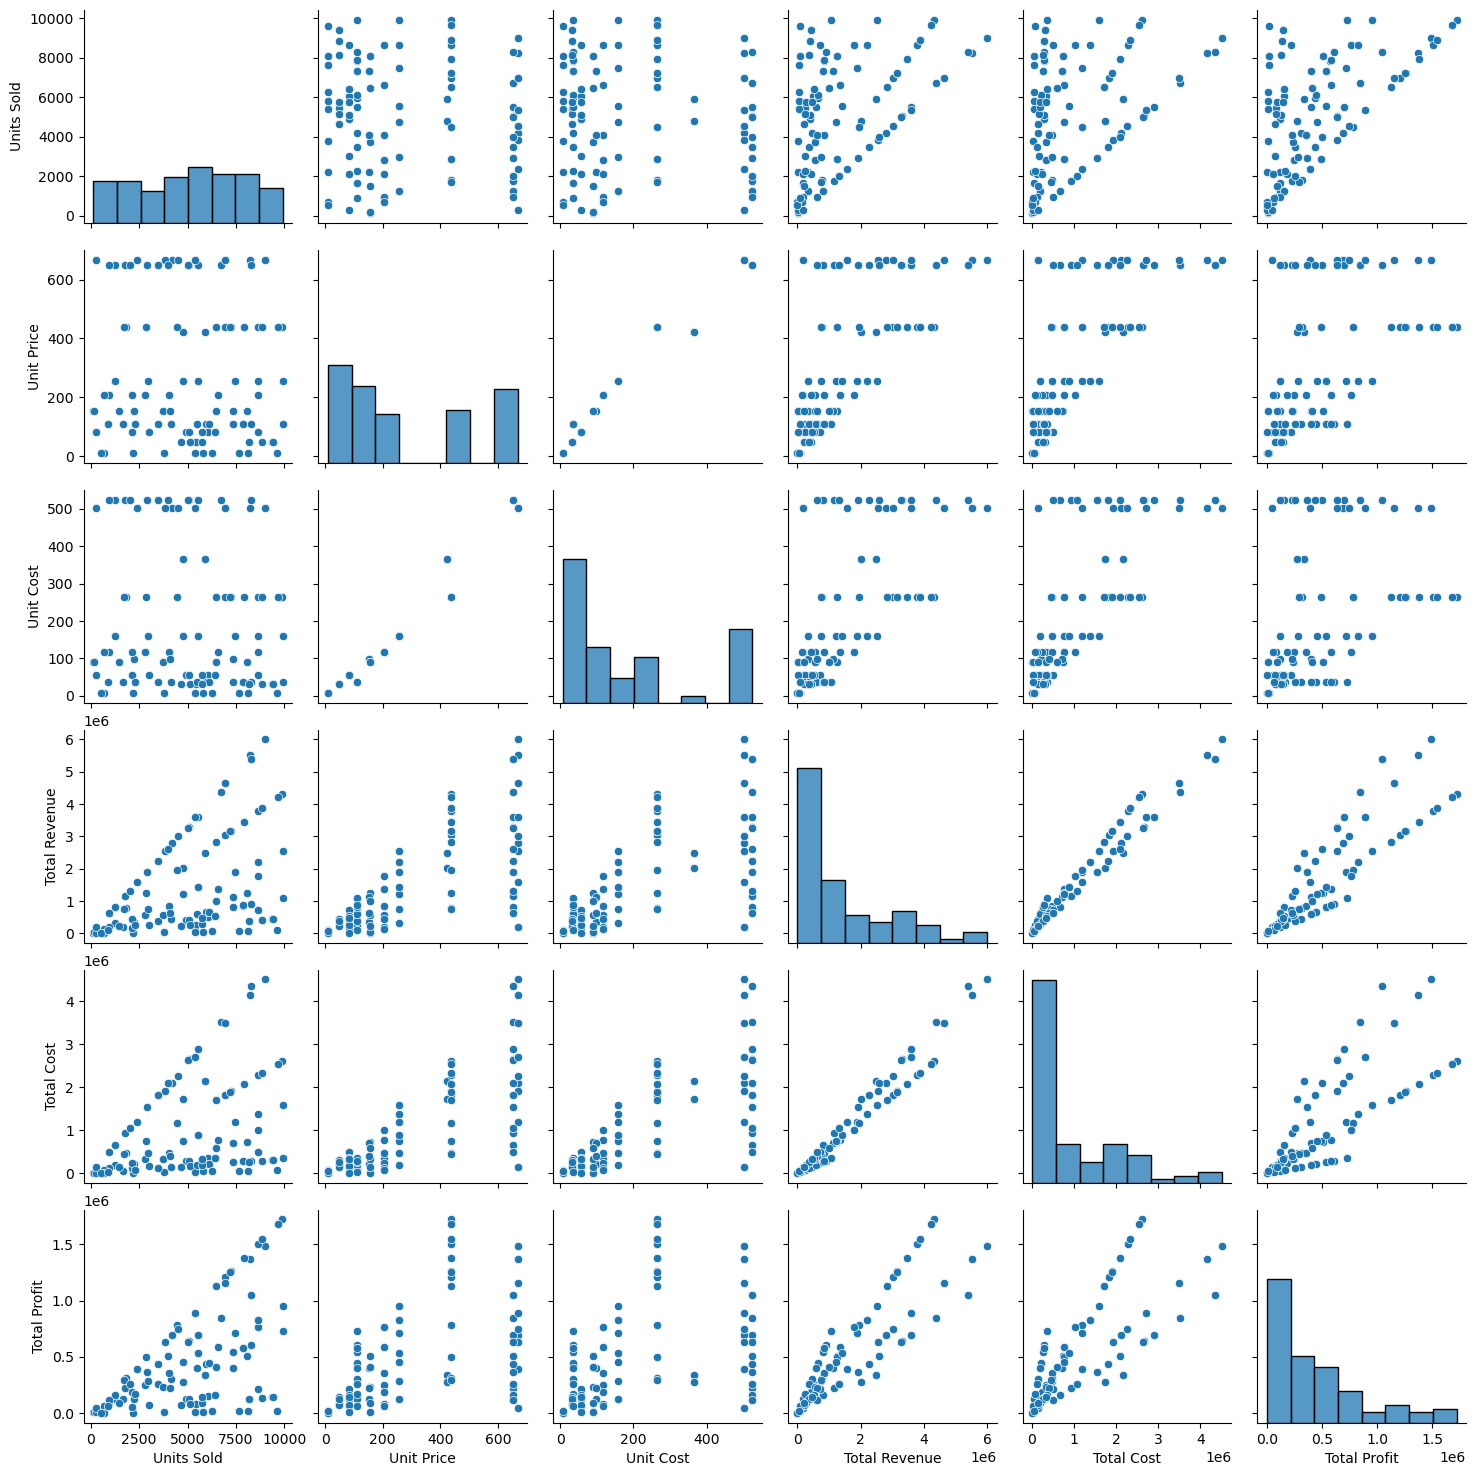

In [33]:
sns.pairplot(df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Item Type']])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

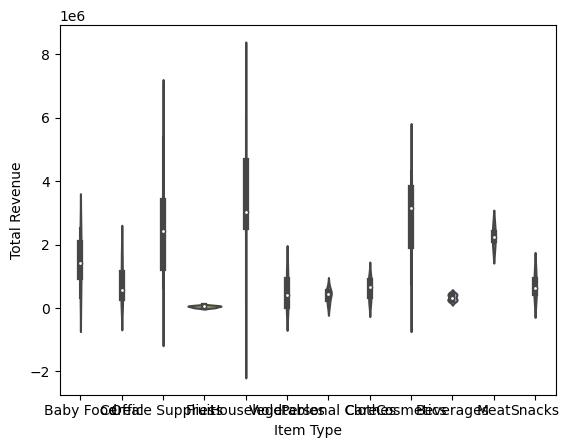

In [34]:
sns.violinplot(x=df['Item Type'], y=df['Total Revenue'])
plt.show
